In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split


In [22]:
df = pd.read_csv("clinvar_conflicting.csv")
df.head()

C:\Users\jaspe\AppData\Local\Temp\ipykernel_70964\4126571102.py:1: DtypeWarning: Columns (0,38,40) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("clinvar_conflicting.csv")


,CHROM,POS,REF,ALT,AF_ESP,AF_EXAC,AF_TGP,CLNDISDB,CLNDISDBINCL,CLNDN,...,SIFT,PolyPhen,MOTIF_NAME,MOTIF_POS,HIGH_INF_POS,MOTIF_SCORE_CHANGE,LoFtool,CADD_PHRED,CADD_RAW,BLOSUM62
0,1,1168180,G,C,0.0771,0.10020,0.1066,MedGen:CN169374,NaN,not_specified,...,tolerated,benign,NaN,NaN,NaN,NaN,NaN,1.053,-0.208682,2.0
1,1,1470752,G,A,0.0000,0.00000,0.0000,"MedGen:C1843891,OMIM:607454,Orphanet:ORPHA9877...",NaN,Spinocerebellar_ataxia_21|not_provided,...,deleterious_low_confidence,benign,NaN,NaN,NaN,NaN,NaN,31.000,6.517838,-3.0
2,1,1737942,A,G,0.0000,0.00001,0.0000,"Human_Phenotype_Ontology:HP:0000486,MedGen:C00...",NaN,Strabismus|Nystagmus|Hypothyroidism|Intellectu...,...,deleterious,probably_damaging,NaN,NaN,NaN,NaN,NaN,28.100,6.061752,-1.0
3,1,2160305,G,A,0.0000,0.00000,0.0000,"MedGen:C1321551,OMIM:182212,SNOMED_CT:83092002...",NaN,Shprintzen-Goldberg_syndrome|not_provided,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.500,3.114491,NaN
4,1,2160305,G,T,0.0000,0.00000,0.0000,"MedGen:C1321551,OMIM:182212,SNOMED_CT:83092002",NaN,Shprintzen-Goldberg_syndrome,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.700,4.766224,-3.0


In [23]:
print("Rows:", df.shape[0])
print("Columns:", df.shape[1])
print(df.dtypes)

print("Class distribution:")
print(df['CLASS'].value_counts())


Rows: 65188
Columns: 46
CHROM                  object
POS                     int64
REF                    object
ALT                    object
AF_ESP                float64
AF_EXAC               float64
AF_TGP                float64
CLNDISDB               object
CLNDISDBINCL           object
CLNDN                  object
CLNDNINCL              object
CLNHGVS                object
CLNSIGINCL             object
CLNVC                  object
CLNVI                  object
MC                     object
ORIGIN                  int64
SSR                   float64
CLASS                   int64
Allele                 object
Consequence            object
IMPACT                 object
SYMBOL                 object
Feature_type           object
Feature                object
BIOTYPE                object
EXON                   object
INTRON                 object
cDNA_position          object
CDS_position           object
Protein_position       object
Amino_acids            object
Codons          

<Axes: xlabel='CLASS', ylabel='count'>

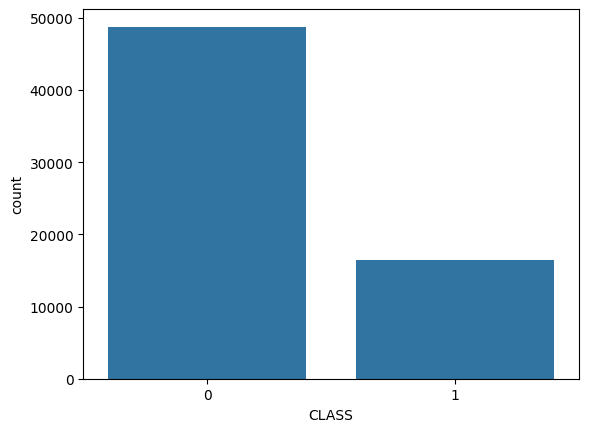

In [24]:
import seaborn as sns
sns.countplot(x='CLASS', data=df)


In [25]:
features = df.drop(columns=['CLASS'])
labels = df['CLASS']
print("feature columns:", features.columns.tolist())


feature columns: ['CHROM', 'POS', 'REF', 'ALT', 'AF_ESP', 'AF_EXAC', 'AF_TGP', 'CLNDISDB', 'CLNDISDBINCL', 'CLNDN', 'CLNDNINCL', 'CLNHGVS', 'CLNSIGINCL', 'CLNVC', 'CLNVI', 'MC', 'ORIGIN', 'SSR', 'Allele', 'Consequence', 'IMPACT', 'SYMBOL', 'Feature_type', 'Feature', 'BIOTYPE', 'EXON', 'INTRON', 'cDNA_position', 'CDS_position', 'Protein_position', 'Amino_acids', 'Codons', 'DISTANCE', 'STRAND', 'BAM_EDIT', 'SIFT', 'PolyPhen', 'MOTIF_NAME', 'MOTIF_POS', 'HIGH_INF_POS', 'MOTIF_SCORE_CHANGE', 'LoFtool', 'CADD_PHRED', 'CADD_RAW', 'BLOSUM62']


In [26]:
print("overall means:")
print(features.select_dtypes(include='number').mean())

print("overall stddevs:")
print(features.select_dtypes(include='number').std())


overall means:
POS                   7.757594e+07
AF_ESP                1.451052e-02
AF_EXAC               1.449218e-02
AF_TGP                1.526350e-02
ORIGIN                1.342486e+00
SSR                   2.269231e+00
DISTANCE              8.257315e+02
STRAND               -6.659097e-03
MOTIF_POS             1.000000e+00
MOTIF_SCORE_CHANGE   -8.000000e-02
LoFtool               3.450584e-01
CADD_PHRED            1.568562e+01
CADD_RAW              2.554131e+00
BLOSUM62             -4.022584e-01
dtype: float64
overall stddevs:
POS                   5.974051e+07
AF_ESP                5.779541e-02
AF_EXAC               5.954210e-02
AF_TGP                5.952741e-02
ORIGIN                5.688772e+00
SSR                   4.190777e+00
DISTANCE              1.069363e+03
STRAND                9.999855e-01
MOTIF_POS             0.000000e+00
MOTIF_SCORE_CHANGE    2.404163e-02
LoFtool               3.612384e-01
CADD_PHRED            1.083635e+01
CADD_RAW              2.961553e+00
BLOSUM62

In [27]:
X_temp, X_val, y_temp, y_val = train_test_split(features, labels, test_size=0.20, random_state=0, stratify=labels) 
#validation

X_train, X_test, y_train, y_test = train_test_split(X_temp, y_temp, test_size=0.25, random_state=0, stratify=y_temp)
#splits train and test

print("Train:", X_train.shape, "Test:", X_test.shape, "Val:", X_val.shape)
#prints row/columns
print("Train class dist:\n", y_train.value_counts(normalize=True))
print("Test class dist:\n", y_test.value_counts(normalize=True))
#gives percentages


Train: (39112, 45) Test: (13038, 45) Val: (13038, 45)
Train class dist:
 CLASS
0    0.747903
1    0.252097
Name: proportion, dtype: float64
Test class dist:
 CLASS
0    0.747891
1    0.252109
Name: proportion, dtype: float64


In [28]:
feature_summary = pd.DataFrame({
    'Data Type': df.dtypes,
    'Missing Values': df.isnull().sum(), #returns true or false based on missing or not
    'Missing Percentage': df.isnull().sum() / len(df) * 100, #percentage of misisng values, takes mising values and divides by total * 100
    'Unique Values': df.nunique()
    
})

print(feature_summary.sort_values(by='Missing Percentage')) #sorts by missing percent


                   Data Type  Missing Values  Missing Percentage  \
CHROM                 object               0            0.000000   
POS                    int64               0            0.000000   
REF                   object               0            0.000000   
ALT                   object               0            0.000000   
AF_ESP               float64               0            0.000000   
AF_EXAC              float64               0            0.000000   
AF_TGP               float64               0            0.000000   
CLNDISDB              object               0            0.000000   
CLNDN                 object               0            0.000000   
CLNHGVS               object               0            0.000000   
CLNVC                 object               0            0.000000   
IMPACT                object               0            0.000000   
Consequence           object               0            0.000000   
Allele                object               0    

In [29]:
temp = feature_summary['Missing Percentage'] #creates list of missing percents
columnsmissing = feature_summary[temp > 60].index #takes the feature summary table, and compares temp with 60, and gives true or false, before making a table of the missing vals
features = features.drop(columns=columnsmissing)

print("dropped columns:", columnsmissing.tolist())
print("shape:", features.shape)

dropped columns: ['CLNDISDBINCL', 'CLNDNINCL', 'CLNSIGINCL', 'SSR', 'INTRON', 'DISTANCE', 'SIFT', 'PolyPhen', 'MOTIF_NAME', 'MOTIF_POS', 'HIGH_INF_POS', 'MOTIF_SCORE_CHANGE', 'BLOSUM62']
shape: (65188, 32)


In [ ]:
# PREPROCESSING!


df = pd.read_csv('clinvar_conflicting.csv', low_memory=False)

features = df.drop(columns=['CLASS']) # drops class variable  to prep model to predict later

def preprocessing(df, uniquelimit=50):
    # preprocessing
    df_processed = df.copy()
    categorical_cols = df_processed.select_dtypes(include=['object']).columns #finds all object (string/text) datatypes

    cols_to_drop = []
    for col in categorical_cols: 
        if df_processed[col].nunique() > uniquelimit:    
            cols_to_drop.append(col) #adds all to-drop columns to cols_to_drop


    df_processed = df_processed.drop(columns=cols_to_drop) #drops
    print(f"Dropped columns: {cols_to_drop}")

    cols_to_encode = []
    for col in categorical_cols:
        if col not in cols_to_drop:
            cols_to_encode.append(col) #columns to onehot encode


    df_processed = pd.get_dummies(df_processed, columns=cols_to_encode, dummy_na=False) #one hot encoding, transforms df_processed into numerical, and dummy_na makes it not create a row for missing values, but to keep it.
    print(f"One-hot encoded columns: {cols_to_encode}")
    return df_processed

def fillmissingval(df):
    #fills missing data w/ median
    df_imputed = df.copy()

    for col in df_imputed.columns:
        if df_imputed[col].isnull().any():
            median_val = df_imputed[col].median()
            df_imputed[col] = df_imputed[col].fillna(median_val) #fills missing values in dataset w/ median

    return df_imputed

features_encoded = preprocessing(features) 
features_final = fillmissingval(features_encoded)

print("\nFinal Check:")
print("\nTotal missing values left:", features_final.isnull().sum().sum()) #sum of missing values in each column to check for missed missing values
print("Data shape: ", features_final.shape) #(rows, columns)


Dropped columns: ['REF', 'ALT', 'CLNDISDB', 'CLNDISDBINCL', 'CLNDN', 'CLNDNINCL', 'CLNHGVS', 'CLNSIGINCL', 'CLNVI', 'MC', 'Allele', 'SYMBOL', 'Feature', 'EXON', 'INTRON', 'cDNA_position', 'CDS_position', 'Protein_position', 'Amino_acids', 'Codons']
One-hot encoded columns: ['CHROM', 'CLNVC', 'Consequence', 'IMPACT', 'Feature_type', 'BIOTYPE', 'BAM_EDIT', 'SIFT', 'PolyPhen', 'MOTIF_NAME', 'HIGH_INF_POS']

Final Check

Total missing values left: 0
Data shape:  (65188, 114)


## CLINVAR DATA CLEANING REPORT

### Introduction

This report explains the data preprocessing steps for clinvar_conflicting_csv. The goal is to transform the data into a clean, numerical format, in order to train it with a binary classification model.

### Feature Analysis

The original dataset of clinvar_conflicting_csv contains 45 features and 1 target variable (CLASS). 
The quantitative data in the dataset included the following columns:
POS, AF_ESP, AF_EXAC, AF_TGP, ORIGIN, SSR, DISTANCE, STRAND, MOTIF_POS, MOTIF_SCORE_CHANGE, LoFtool, CADD_PHRED, CADD_RAW, BLOSUM62

The categorical features that are suitable for one-hot encoding:
CHROM, CLNVC, Consequence, IMPACT, Feature_type, BIOTYPE, BAM_EDIT.

The remaining columns won't be used, as they all contain a high amount of unique text entries, making them inefficient for one-hot encoding.

### Missing Value Analysis

Many of the features contains missing values. In order to handle this, we have to first identify which columns have missing values, and what percentage of missing data makes a column missing. I did this by checking if >60% of the data in the columns are missing. The list of missing data includes:
MOTIF_POS, MOTIF_NAME, SIFT, PolyPhen, BLOSUM62, INTRON

### Preprocessing

After dropping the high missing data columns, the next step was to drop highly unique columns (those with >50 unique values). If we didn't do this, it would lead to the curse of dimensionality, as when one-hot encoding, it creates a column for every unique category. Therefore, if a cetgory had thousands of unique values, it would create thousands of new columns, leading to overfitting and inefficiency. Dropping the highly unique columns removes unnecessary noise, making the program more efficient.

### One-hot encoding

One-hot encoding is the process of convering all categorical / qualitative variables into quantitative variables. This is done by following the steps:
1. Find the unique categories
2. Create new columns, with a binary 0 or 1 for each category
3. Places 1s and 0s coresponding to the original data, in the correct row / column
4. Drops the original text column, as now everything is represented numerically


One-hot encoding prevents the model from incorrectly learning relations, as if we just assigned each unique value to a number, it would think higher numbers are more valuable than lower numbers.

### Filling in values

After the dropping and dencoding steps, with the numerical data, the last step is to fill in all the blank missing data. I did this by finding the median of the column, and filling all missing data with this median. This works pretty well, as it gives an average of the dataset without being impacted by skews. However, one thing to note is that if there is an overwhelming about of missing data, by replacing all the missing data with the same value, it could skew the data a bit. 



Comments are in the code block right above that explains the preprocessing steps.

